In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [3]:
dataframe = pd.read_csv(r"Dataset_IDEAM/Estación_Cajibio/dataset_cajibio_organizado.csv")#, delimiter="|")
dataframe.head()

,Fecha,brillo solar,Fecha.1,precipitacion,Fecha.2,tempMedia,Fecha.3,tempMinima,Fecha.4,tempMaxima
0,2017-07-31,5.9,2005-01-01,0.0,2017-11-30,19.05,2005-01-01,19.8,2005-01-01,22.0
1,2017-08-01,0.0,2005-01-02,0.0,2017-12-01,17.30,2005-01-02,15.4,2005-01-02,22.0
2,2017-08-02,0.0,2005-01-03,14.0,2017-12-02,18.30,2005-01-03,16.3,2005-01-03,21.2
3,2017-08-03,0.0,2005-01-04,2.3,2017-12-03,18.40,2005-01-04,16.4,2005-01-04,23.6
4,2017-08-04,0.0,2005-01-05,9.1,2017-12-04,18.65,2005-01-05,16.4,2005-01-05,19.0


In [5]:
dataframe.describe()

,brillo solar,precipitacion,tempMedia,tempMinima,tempMaxima
count,853.000000,5638.000000,5391.000000,5391.000000,853.000000
mean,3.479132,6.411547,16.027571,21.396661,22.093904
std,2.697954,12.087377,1.706718,3.467385,2.344709
min,0.000000,0.000000,11.200000,11.400000,17.600000
25%,1.100000,0.000000,15.000000,19.600000,20.200000
50%,3.300000,1.000000,15.800000,22.000000,21.200000
75%,5.200000,7.200000,16.800000,24.000000,24.200000
max,10.600000,128.900000,25.600000,32.400000,32.000000


In [7]:
dataframe.columns=[['FechaBS','brilloSolar','FechaPrec','precipitacion','FechaTempMed','tempMedia','FechaTempMin','tempMinima','FechaTempMax','tempMaxima']]
dataframe.head()

,FechaBS,brilloSolar,FechaPrec,precipitacion,FechaTempMed,tempMedia,FechaTempMin,tempMinima,FechaTempMax,tempMaxima
0,2017-07-31,5.9,2005-01-01,0.0,2017-11-30,19.05,2005-01-01,19.8,2005-01-01,22.0
1,2017-08-01,0.0,2005-01-02,0.0,2017-12-01,17.30,2005-01-02,15.4,2005-01-02,22.0
2,2017-08-02,0.0,2005-01-03,14.0,2017-12-02,18.30,2005-01-03,16.3,2005-01-03,21.2
3,2017-08-03,0.0,2005-01-04,2.3,2017-12-03,18.40,2005-01-04,16.4,2005-01-04,23.6
4,2017-08-04,0.0,2005-01-05,9.1,2017-12-04,18.65,2005-01-05,16.4,2005-01-05,19.0


In [13]:
humedad = dataframe[['humedad']]
precipitacion = dataframe[['precipitacion']]
tempMedia = dataframe[['tempMedia']]
tempMinima = dataframe[['tempMinima']]
tempMaxima = dataframe[['tempMaxima']]


In [16]:
precipitacion.head()

,precipitacion
0,2005-01-01 07:00:00|0.0
1,2005-01-02 07:00:00|0.0
2,2005-01-03 07:00:00|14.0
3,2005-01-04 07:00:00|2.3
4,2005-01-05 07:00:00|9.1


In [17]:
df = pd.concat([tempAire, humAire],axis=1)

In [18]:
df = pd.concat([df, tempMaxAire],axis=1)
df = pd.concat([df, tempMinAire],axis=1)
df = pd.concat([df, humMaxAire],axis=1)
df = pd.concat([df, humMinAire],axis=1)
df = pd.concat([df, precipitacion],axis=1)

In [19]:
# df = pd.concat([df, precipitacion],axis=1)

In [20]:
df

,tempAire,humAire,tempMaxAire,tempMinAire,humMaxAire,humMinAire,precipitacion
1,21.266667,70.000000,22.166667,20.250000,73.000000,66.090909,0.000000
2,17.795833,91.750000,18.408333,17.304167,93.000000,90.391304,0.441667
3,17.662500,77.250000,18.358333,16.900000,80.791667,75.000000,0.033333
4,11.691667,89.708333,12.079167,11.416667,91.333333,88.130435,0.016667
5,12.050000,86.000000,12.541667,11.604167,88.125000,83.913043,0.000000
...,...,...,...,...,...,...,...
118,20.575000,87.541667,21.104167,20.125000,89.583333,85.391304,0.008333
119,21.487500,85.291667,22.420833,20.516667,88.625000,81.565217,0.358333
120,19.553333,86.333333,19.892857,19.042857,88.285714,84.428571,0.000000
121,23.950000,70.750000,24.825000,23.200000,74.666667,67.181818,0.000000


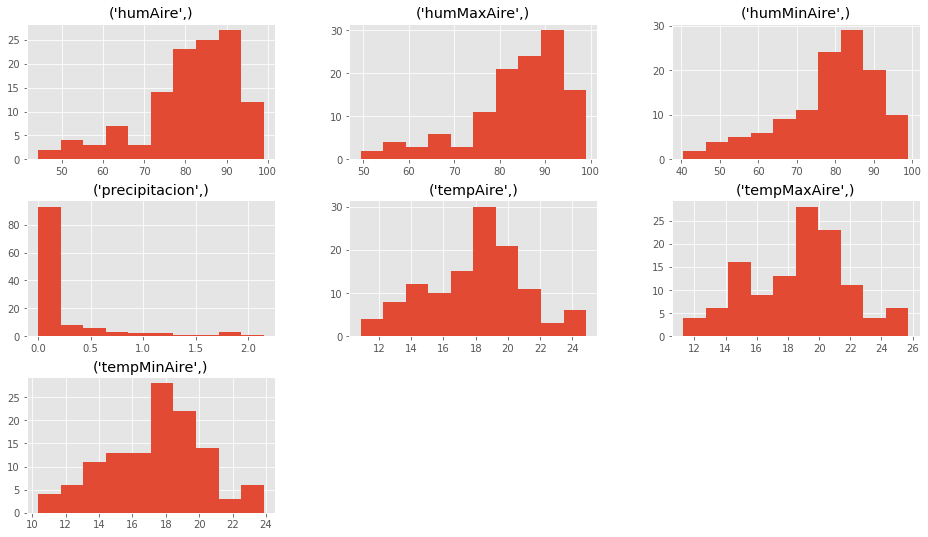

In [21]:
df.hist()
plt.show()

In [22]:
#df["tempAire"]= df["tempAire"].astype(int)
#df["humAire"]= df["humAire"].astype(int)
#precipitacion["precipitacion"]= precipitacion["precipitacion"].astype(int)
df = df.fillna(0)
df = df.astype(int)

In [23]:
x = df[['tempAire','humAire']].values
y = df[['precipitacion']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
df.dtypes

tempAire         int64
humAire          int64
tempMaxAire      int64
tempMinAire      int64
humMaxAire       int64
humMinAire       int64
precipitacion    int64
dtype: object

In [25]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.87


/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [26]:
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[27  0  0]
 [ 3  0  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        27
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1

    accuracy                           0.87        31
   macro avg       0.29      0.33      0.31        31
weighted avg       0.76      0.87      0.81        31



/opt/anaconda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


ValueError: 'c' argument has 122 elements, which is not acceptable for use with 'x' with size 122, 'y' with size 122.

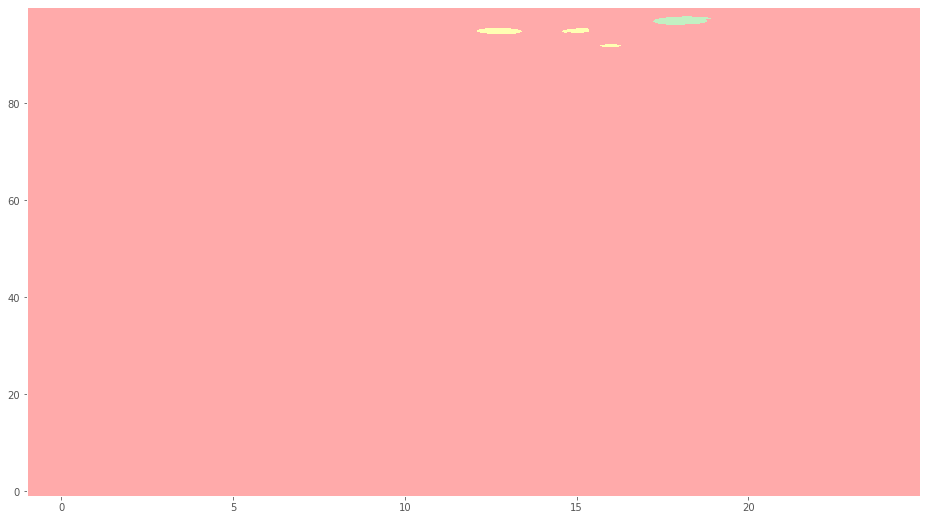

In [33]:
h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(x, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
#plt.scatter(np.arange(len(values)), values, c = colors/255)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
 
plt.show()